In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [5]:
vad = pd.read_csv('./NRC-VAD-Lexicon.csv')
vad = vad[['valence', 'arousal', 'dominance']]
print(vad.loc[0]['valence'])
vad.head()

0.479


,valence,arousal,dominance
0,0.479,0.606,0.291
1,0.520,0.636,0.282
2,0.427,0.490,0.437
3,0.385,0.407,0.288
4,0.510,0.276,0.485


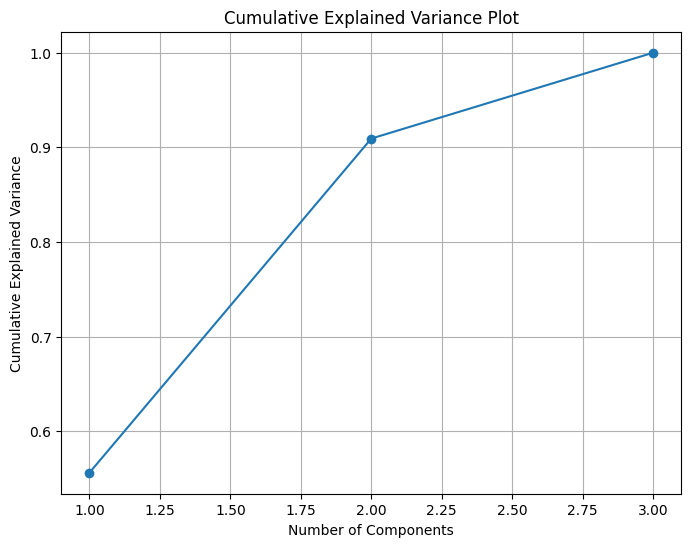

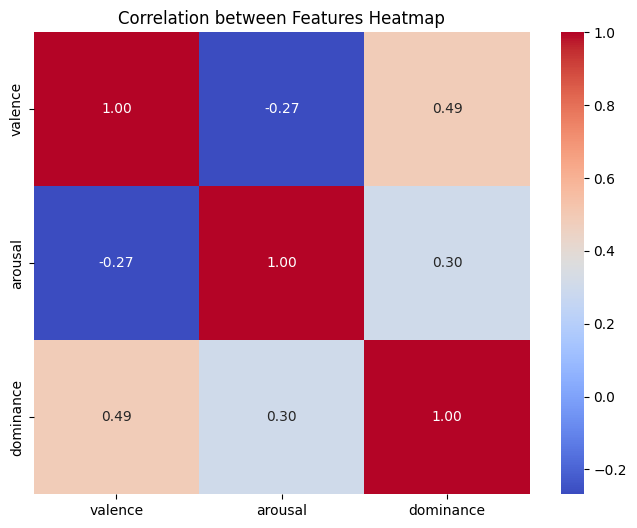

In [11]:
vadValues = vad.values
 
# perform pca
pca = PCA(n_components=3)
X_pca = pca.fit_transform(vadValues)
 
# cumulative explained variances: take cumsum of explained var ratios
# explained var ratio- proportion of total variance explained by each component
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
 
# plot line graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()
 
# correlation matrix
correlation_matrix = vad.corr()
 
# plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Features Heatmap')
plt.show()